# <center>Lab 8: Faraday's Law</center>

<strong>Name:

In [ ]:
#run me!
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy import optimize

### <font color=green>With the transition to online labs, the data you would typically collect has been collected for you. In addition, we have simulated some aspects of the lab that you would normally do hands-on.

## <center>Part One: Probing the Magnetic Fields of the Primary and Secondary Coils</center>

<strong>In the first experiment, we explore the field of the primary and secondary coils. We begin by holding a bar magnet in the primary coil</strong>

<font color=green><strong> We can simulate this experiment of placing a bar magnet inside a coil. Inside the coil, the magnetic field points in the $\pm \hat{z}$ direction, depending on the direction of the current.

<font color=green><strong>The frequency of the function generator and direction of the bar magnet can be changed in this experiment. The direction is in terms of the polar angle $\theta$ and azimuthal angle $\phi$ as in the following image.

<strong><font color=purple>Directions: Use the code cell below to input and change the direction of your simulated bar magnet until you find the plane in which the 'buzzing' is the strongest and weakest. The 'buzzing' is strongest when the torque is maximized; the simulation plots the magnitude of the torque about each axis. You can change the frequency of the oscillations `freq` and the direction of the magnet with the variables `theta` and `phi` inside the cell. Use this simulation to build intuition and answer questions. 

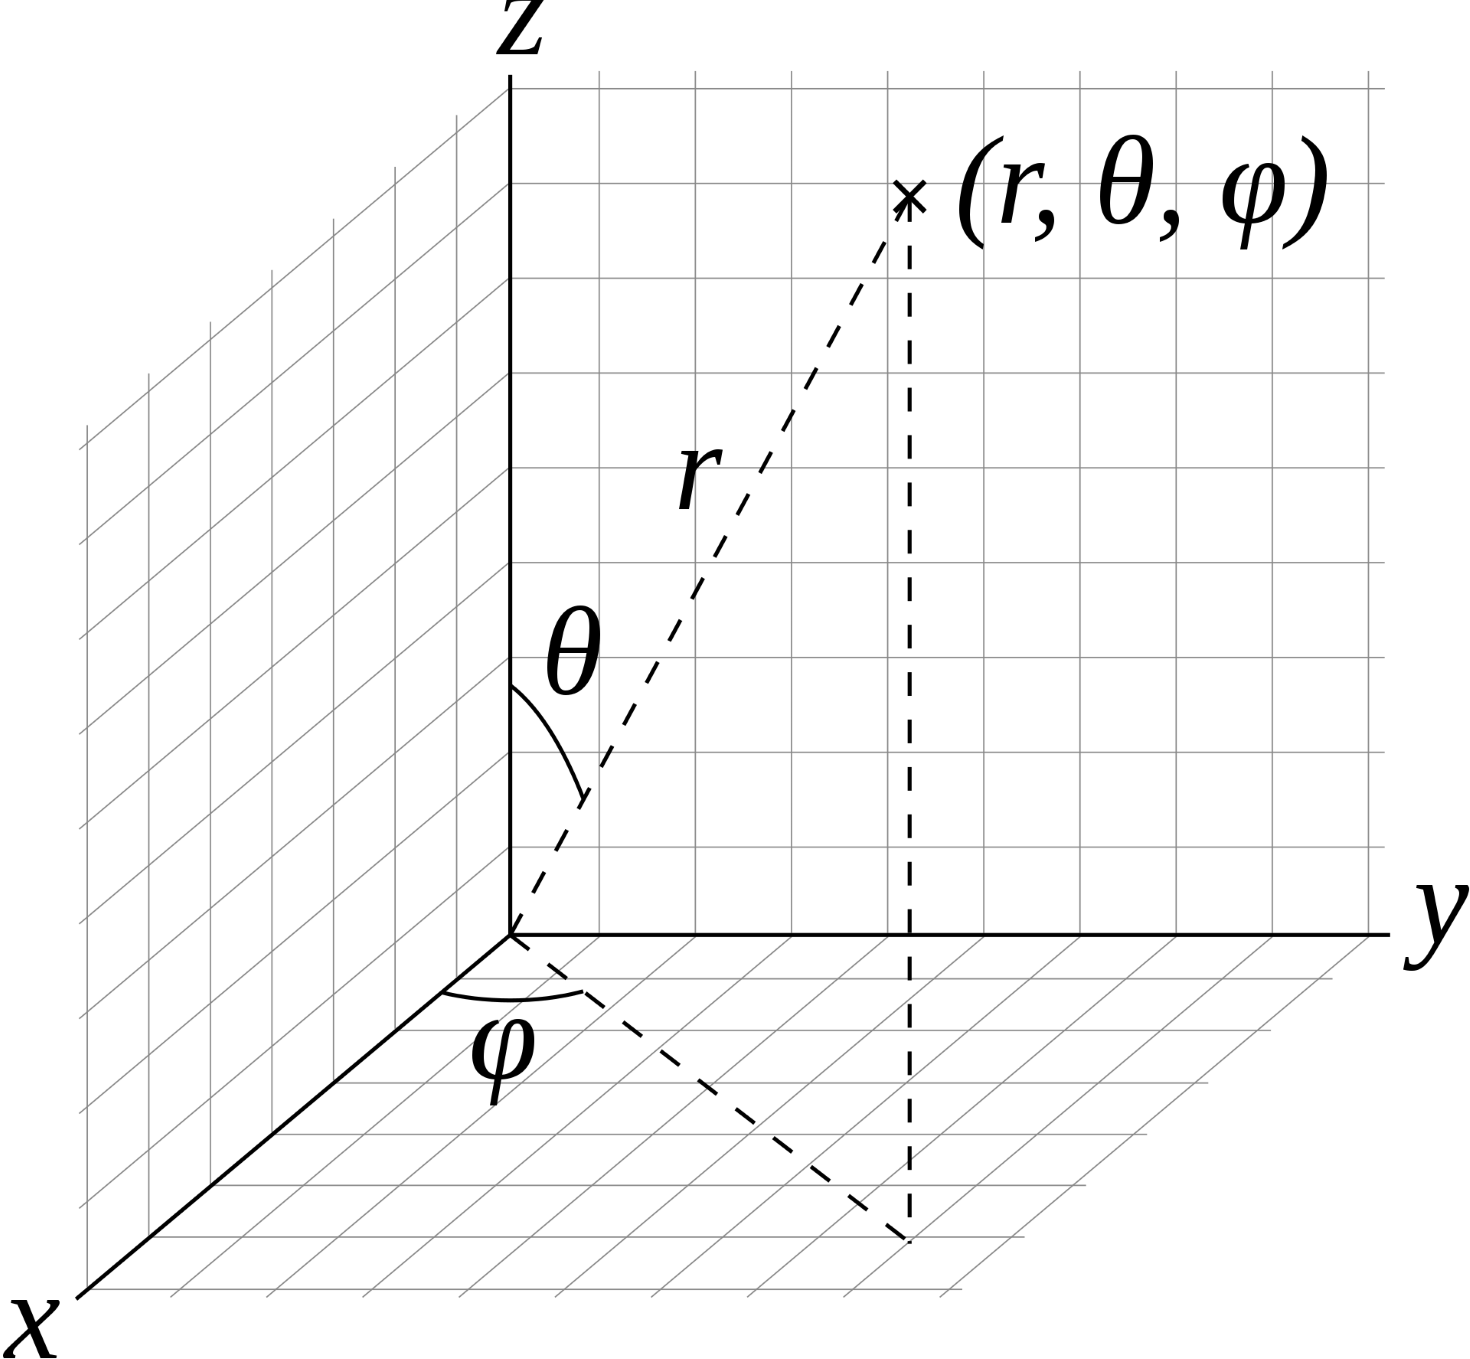

In [ ]:
############################################################
### Edit this to change the function generator frequency ###
freq = 50 # Hz
omega = freq*2*np.pi #Hz
                    ### End Edit ###
############################################################


def B_coil(t,B_0,omega):
    B_field = B_0 * np.outer(np.sin(omega*t),np.array([0,0,1.]))
    return B_field

def mag_torque(dipole_moment,B_ext):
    torque = np.cross(dipole_moment,B_ext)
    return torque
    
# direction of the bar magnet's north pole, in terms of theta and phi in spherical coordinates
#################################################
### Edit these to change bar magnet direction ###
theta = 0
phi = 0
                ### End Edit ###
##################################################

dipole_moment_mag = 10. # A*m^2
dipole_moment = dipole_moment_mag * np.array([np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)])

coil_current = 0.050 # A
coil_field_mag = 4.23e-3 * coil_current * 10000 # G

time = np.linspace(0,0.04,100*freq)

coil_field = B_coil(time,coil_field_mag,omega)
torque = mag_torque(dipole_moment,coil_field)/10000

plt.figure(figsize=(16,5))
plt.subplot(121)
plt.plot(time*1000,coil_field[:,2])
plt.title('Magnetic Field of Coil along $\hat{z}$')
plt.ylabel('Magnetic Field Magnitude [G]')
plt.xlabel('Time [ms]')
plt.subplot(122)
plt.plot(time*1000,np.linalg.norm(torque,axis=1))
plt.ylabel('|Torque| [N$\cdot$m]')
plt.xlabel('Time [ms]')
plt.show()


**<font color=blue> Problem 8.1: Rotate the magnet until you find the configuration where the buzzing is at a minimum. Define the $\hat{z}$ direction to be along the axis of the coil, $\hat{y}$ to be perpendicular to the ground (upward), and $\hat{x}$ to be perpendicular to $\hat{y}$ and $\hat{z}$, bisecting the coil. In which direction is the buzzing at a minimum? In which direction is the buzzing at a maximum?</font>**

_Write your answer in this cell_

<strong><font color=green>This next question is not obvious when you use the simulation, but it becomes clear when you think about the time scale. Think about whether or not you would be able to feel the torque in one direction before it started torqing in the opposite direction.

**<font color=blue> Problem 8.2: What happens to the buzzing of the magnet if you change the frequency on the function generator?</font>**

_Write your answer in this cell_

<strong><font color=green>To answer this next question, imagine turning off the Helmholtz coil and simply holding the bar magnet up to the secondary coil. We hold the magnet still and see no reading on the oscilloscope. When we wave it around, the oscilloscope reacts and shows a signal that is clearly corrolated with your movements.

**<font color=blue> Problem 8.3: Which of the two cases, holding the magnet still or moving it, produces an EMF? Why?</font>**

_Write your answer in this cell_

## <center>Part Two: Driving the Coils with a Triangle Wave</center>

<strong><font color=green> Problem 8.4: A measurement of $\mathcal{E}_{direct}$ has been performed for you. The cell below contains that value.

$\mathcal{E}_{direct} = 0.75$ [V]

<strong><font color=green>Problem 8.5: The quantities we need to calculate $\mathcal{E}_{indirect}$ have been measured for you. The code cell below contains the values.

$\Delta t = 0.01$ [s] <br>
$r_{inner} = 0.061$ [m] <br>
$r_{outer} = 0.075$ [m] <br>
$\Delta V = 3.0$ [V]

In [ ]:
delta_t = 0.01 #s
r_inner = 0.061 # m
r_outer = 0.075 # m
delta_V = 3.0 # V

In [ ]:
Aeff = 
delta_I = 
delta_B = 
E_indirect = 
print(E_indirect)

<font color=blue><strong>Problem 8.6: Record your estimate for the effective area.


_Write your answer in this cell_

<font color=blue><strong>Problem 8.7: Now calculate $\cal{E}_{indirect}$ during a half-cycle. Note that you cannot see all of the turns of wire around the secondary coil. The number of turns for the secondary coil is $N$ = 2000.</font>


_Write your answer in this cell_

<font color=blue><strong>Problem 8.8: Based on your initial measurement $\cal{E}_{direct}$, predict what would happen if you turned the secondary coil $45^{\circ}$ on its mount. Be quantitative. We will call this $\mathcal{E}_{direct,45}$. What does this mean physically?

_Write your answer in this cell_

<font color=green><strong>Problem 8.9: A measurement of $\mathcal{E}_{measured,45}$ has been made for you. The cell below contains that value.

$\mathcal{E}_{measured,45}= 0.5$ [V]

<font color=blue><strong>Problem 8.10: Are the measurements of $\mathcal{E}_{direct}$ and $\mathcal{E}_{indirect}$ consistent with one another? <font color=green>Normally we'd do a statistical analysis, but since we only have one data set, describe whether or not the two numbers agree, and how well they agree.

_Write your answer in this cell_

<font color=blue><strong>Problem 8.11: Are the measurements of $\cal{E}_{direct,45}$, and $\cal{E}_{measured,45}$ consistent with one another?

_Write your answer in this cell_

<font color=blue><strong>Problem 8.12: Is the earth's magnetic field a source of systematic uncertainty in this experiment? Why or why not?

_Write your answer in this cell_

## <center>Part Three: Driving the Coils with a Sine Wave</center>

<strong><font color=green>Run the following code cell to simulate a measurement of the primary and secondary coil voltages.

In [ ]:

omega = 50*2*np.pi #Hz

def EMF(t,B_0,omega,Aeff,N,theta):
    calE=-1.*B_0*omega*np.cos(omega*t)*N*Aeff*np.cos(theta)
    return calE

coil_voltage_mag = 4. # V
coil_resistor = 50. # Ohms
coil_current_mag = 4./50. # A
coil_field_mag = 4.23e-3 * coil_current_mag # T

time = np.linspace(0,2/(omega/2/np.pi),1000)

prime_coil_voltage = 4.*np.sin(omega*time)

Aeffective = (np.pi*r_inner**2 + np.pi*r_outer**2)/2
N = 2000

second_coil_EMF = EMF(time,coil_field_mag,omega,Aeffective,N,0)

fig, ax1 = plt.subplots(figsize=(16,10))
ax2 = ax1.twinx()
ax1.plot(time*1000,prime_coil_voltage,'b-')
ax2.plot(time*1000,second_coil_EMF,'r-.')
ax2.plot(time*1000,np.zeros(1000),'k')

poi_y1 = [0,4,0,-4]
poi_x1 = [0,5,10,15]
poi_x2 = [5,10,15,20]
poi_y2 = [0,second_coil_EMF[250],0,second_coil_EMF[500]]
ax1.scatter(poi_x1,poi_y1,s=500,c='b')
ax2.scatter(poi_x2,poi_y2,s=500,c='r')
txt1 = ['Primary 1','Primary 2','Primary 3','Primary 4']
txt2 = ['Secondary 1', 'Secondary 2', 'Secondary 3', 'Secondary 4']

for (i, label) in enumerate(txt1):
    ax1.annotate(label,(poi_x1[i]+0.5,poi_y1[i]+.3))
    
    
for (i, label) in enumerate(txt2):
    ax2.annotate(label,(poi_x2[i]+0.5,poi_y2[i]+.15))

ax1.set_xlabel('Time [ms]')
ax1.set_ylabel('Primary Coil Voltage [V]', color='b')
ax2.set_ylabel('Secondary Coil EMF [V]', color='r')

plt.show()

<strong><font color=blue>Problem 8.13: Find the following points on the simulated measurements of primary voltage and secondary EMF:
1. The point at which the flux through the secondary is changing most rapidly.
* The point at which the current through the primary is a maximum.
* The point at which flux through the secondary is a maximum.
* The point at which the current in the primary is zero.
   

_Write your answer in this cell_

<font color=blue><strong>Problem 8.14: When varying the frequency on the function generator, how is the voltage across the resistor affected? How will a larger voltage across the resistor affect the measured peak EMF?

_Write your answer in this cell_

<font color=blue><strong>Problem 8.15: Set the amplitude so that the voltage across the 50$~\Omega$ resistor is 4V peak-to-peak and record the peak EMF displayed each frequency in the table provided on the worksheet. <font color=green> These values have been measured for you and recorded on the following table.

$f$ [Hz] | $\mathcal{E}$ [V]
---|---
50 | 0.78
100 | 1.52
150 | 2.23
200 | 3.05
300 | 4.45
400 | 5.95
500 | 7.45

In [ ]:
selected_freqs = np.array([50,100,150,200,300,400,500])
peak_EMF = np.array([0.78,1.52,2.23,3.05,4.45,5.95,7.45])

<font color=blue><strong>Problem 8.16: Make a plot of ${\cal E}_{peak}$ vs. $f$. From Eq.53 we know that the peak voltage is linear in the frequency. Use the provided code to fit your data to a line and verify this fact.

In [ ]:
def line(x,m,b):
    return x*m + b

def line(x,m,b):
    y = m*x + b
    return y

params , cov = optimize.curve_fit(line,selected_freqs,peak_EMF)

all_freqs = np.linspace(50,500,200)
fit_EMFs = line(all_freqs,params[0],params[1])

plt.figure()
plt.plot(selected_freqs,peak_EMF,'kx')
plt.plot(all_freqs,fit_EMFs,'g--')
plt.xlabel('x_label')
plt.ylabel('y_label')
plt.title('title')
plt.show()
print('My fit slope is {}'.format(params[0]))
print('My fit bias is {}'.format(params[1]))

<font color=blue><strong>Problem 8.17: Based on your peak voltage across the resistor ($V_{peak} = V_{p-p} / 2$), determine the peak current in the resistor and the peak magnetic field in the Helmholtz coils. <font color=green>Due to a data collection discrepancy, please use $V_{p-p} = 2$ instead of $V_{p-p} = 4$ in the lab manual.

_Write your answer in this cell_

<font color=blue><strong>Problem 8.18: Compute the expected ${\cal E}_{peak}$ at $f=200$ Hz using Eq.53 and the results of your fit.

_Write your answer in this cell_

<font color=blue><strong>Problem 8.19: Note that the slope of your ${\cal E}_{peak}$ vs. $f$ graph is $2\pi NB_0A$. As a sanity check, use your slope to infer the effective area of the secondary coil. How well does this agree with our estimate?

_Write your answer in this cell_

# Saving and Submitting

When you are done, save this notebook by pressing `crtl+s` or the save icon on the top left. Download the file if you are working online. Submit your .ipynb file to canvas.